During this week’s Independent project, you will get to test the skills that you learned this week. More specifically, you will get the test your understanding of the following learning outcomes.

**Overall Learning Outcomes**

I can understand and apply supervised learning algorithms such as regression, decision trees, KNN, SVM, naive Bayes, random forests to solving business problems.
I can understand the benefits, limitations, and requirements of various supervised learning algorithms.

# Experimental Procedure:


* Download the two datasets from the given links:

* Randomly partition each dataset into two parts i.e 80 - 20  sets.

* For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.



* Compute the accuracy (percentage of correct classification).

* Report the confusion matrix of each classifier.

* Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

* Suggest and apply at least one of the optimization techniques that you learned earlier this week.

* Provide further recommendations to improve both classifiers.

1. Defining the Question

* a) Specifying the Data Analytic Question

Can we predict who would survive the titanic cruise inccident 

* b) Defining the Metric for Success

Having a model with a >70% accuracy rate

* c) Understanding the context

Using KNN to predict our feature variable

* d) Recording the Experimental Design

We will use the establish process learnt in moringa for analysis and documenting

* e) Data Relevance
The data is a common dataset used for learning ML techniques

**Lets get to it**


Starting with imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn


In [20]:
#loading the datasets from my drive
train = pd.read_csv('/content/drive/MyDrive/Week 9/train-knn.csv')
test = pd.read_csv('/content/drive/MyDrive/Week 9/test-knn.csv')

Lets get familiar with the datasets we have 

In [3]:
train.info()
#this is the titanic dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#the top and size of the dataset
print(train.head(5))
print(train.shape)

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
(891, 12)


In [6]:
print(train.tail(5))
#the bottom of the dataset

     PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
886          887         0       2  ...  13.00   NaN         S
887          888         1       1  ...  30.00   B42         S
888          889         0       3  ...  23.45   NaN         S
889          890         1       1  ...  30.00  C148         C
890          891         0       3  ...   7.75   NaN         Q

[5 rows x 12 columns]


In [7]:
test.info()
#missing the feature column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
#the top and size of the dataset
print(test.head(5))
print(test.shape)

   PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]
(418, 11)


In [9]:
print(test.tail(5))
#the bottom of the dataset

     PassengerId  Pclass                          Name  ...      Fare  Cabin  Embarked
413         1305       3            Spector, Mr. Woolf  ...    8.0500    NaN         S
414         1306       1  Oliva y Ocana, Dona. Fermina  ...  108.9000   C105         C
415         1307       3  Saether, Mr. Simon Sivertsen  ...    7.2500    NaN         S
416         1308       3           Ware, Mr. Frederick  ...    8.0500    NaN         S
417         1309       3      Peter, Master. Michael J  ...   22.3583    NaN         C

[5 rows x 11 columns]


Lets do some cleaning of the dataset




In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
#We will replace the missing age values with the mean value, the embarked with the mode value.The cabin will not be used so no need

mean_age = train['Age'].mean()
train['Age'].fillna(value=mean_age, inplace=True)
train['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [23]:
#Finding which one has 
item_counts = train["Embarked"].value_counts()
print(item_counts)
train['Embarked'].fillna(value='S', inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [24]:
item_counts = train["Embarked"].value_counts()
print(item_counts)

S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [25]:
#We will encode the embarked colum so that we can replace the missing ones easier
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train['Embarked'] = lb.fit_transform(train['Embarked'])
train['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [40]:
test.info()#Well do something similar and sort out age and fare only


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [41]:
mean_age = test['Age'].mean()
test['Age'].fillna(value=mean_age, inplace=True)
test['Age']

mean_fare = test['Fare'].mean()
test['Fare'].fillna(value=mean_age, inplace=True)
test['Fare']
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [42]:
#Next is the encoding
item_counts = test["Embarked"].value_counts()
print(item_counts)

S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [43]:
test['Embarked'] = lb.fit_transform(test['Embarked'])

# ***Visuals!!***

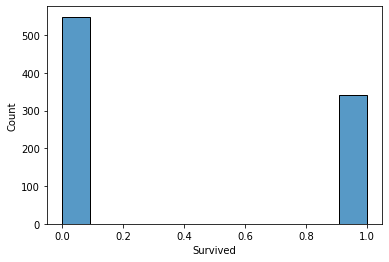

In [30]:
#Only the cabin has missing values, we will begin by doing some visuals
sn.histplot(x=train['Survived'])

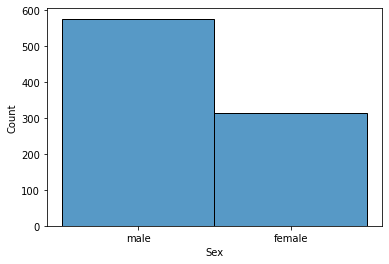

In [32]:
sn.histplot(x=train['Sex'])
#more guys than gals in the set

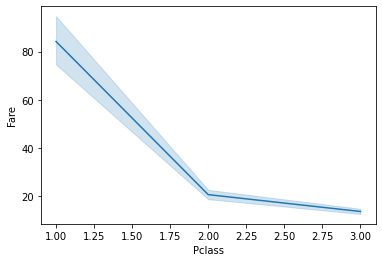

In [34]:
sn.lineplot(x=train['Pclass'], y=train['Fare'])
#The first class tickets were more expensive

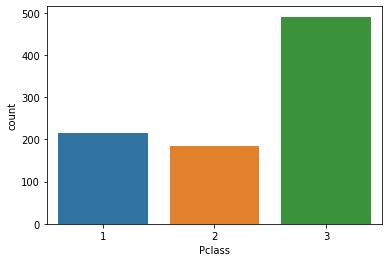

In [36]:
sn.countplot(x=train['Pclass'])
#Most people were in 3rd class

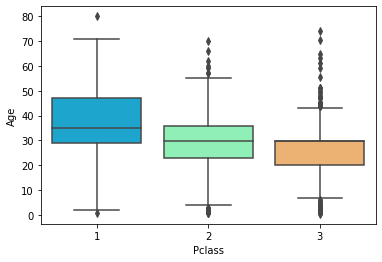

In [39]:
sn.boxplot(x=train['Pclass'], y=train['Age'], palette='rainbow')
#Distribution of Age by Passenger Class

In [44]:
#Forgot to encode for sex
train['Sex'] = lb.fit_transform(train['Sex'])
test['Sex'] = lb.fit_transform(test['Sex'])

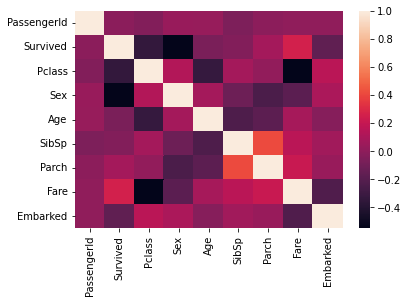

In [49]:
sn.heatmap(train.corr())

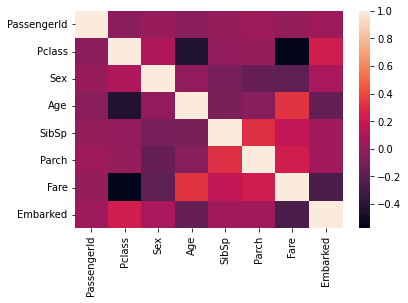

In [50]:
sn.heatmap(test.corr())

# Onto the reason we are here, **Modeling**

In [47]:
X = train.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis = 1)
y = train['Survived']

In [48]:
#Starting with 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [51]:
#Training the model with 5 neighbours - our vanilla vesion
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

[[91 19]
 [39 30]]


In [54]:
classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       110
           1       0.61      0.43      0.51        69

    accuracy                           0.68       179
   macro avg       0.66      0.63      0.63       179
weighted avg       0.67      0.68      0.66       179



The level of accuracy is around ~63%, lets see what we can do to improve it

In [ ]:
test2 = test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [92]:
#Finding the best value for n neighbours
classifier = KNeighborsClassifier(n_neighbors=31)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#31 one gives a good level for n with 73% accuracy

In [93]:
confusion_matrix(y_test, y_pred)

array([[101,   9],
       [ 39,  30]])

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       110
           1       0.77      0.43      0.56        69

    accuracy                           0.73       179
   macro avg       0.75      0.68      0.68       179
weighted avg       0.74      0.73      0.71       179



In [97]:
#Lets attempt to shuffle the split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
classifier = KNeighborsClassifier(n_neighbors=31)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [98]:
confusion_matrix(y_test, y_pred)
#better results in the confusion matrix but less accuracy

array([[144,  20],
       [ 68,  36]])

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       164
           1       0.64      0.35      0.45       104

    accuracy                           0.67       268
   macro avg       0.66      0.61      0.61       268
weighted avg       0.67      0.67      0.64       268



In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
classifier = KNeighborsClassifier(n_neighbors=31)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [101]:
confusion_matrix(y_test, y_pred)

array([[179,  42],
       [ 73,  63]])

In [102]:
print(classification_report(y_test, y_pred))
#the accuracy level has come down

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       221
           1       0.60      0.46      0.52       136

    accuracy                           0.68       357
   macro avg       0.66      0.64      0.64       357
weighted avg       0.67      0.68      0.67       357



# Optimization 

In [104]:
#Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
classifier = KNeighborsClassifier(n_neighbors=31)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [119]:
confusion_matrix(y_test, y_pred)

array([[101,  14],
       [ 36,  28]])

In [120]:
print(classification_report(y_test, y_pred))
#The accuracy is around 72% with the optmization techiques

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       115
           1       0.67      0.44      0.53        64

    accuracy                           0.72       179
   macro avg       0.70      0.66      0.66       179
weighted avg       0.71      0.72      0.70       179



Using LDA did not have a very large impact on the accuracy, i believe the issue is not having enough training data, ill comnine the 2 sets below and see

In [128]:
both = pd.concat([train,test])
both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 132.9+ KB


In [130]:
#After some rough cleaning
both['Survived'].fillna(value=0, inplace=True)
both['Survived']

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
413    0.0
414    0.0
415    0.0
416    0.0
417    0.0
Name: Survived, Length: 1309, dtype: float64

In [131]:
X = both.drop(['PassengerId','Survived','Name','Ticket', 'Cabin'], axis = 1)
y = both['Survived']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [134]:
classifier = KNeighborsClassifier(n_neighbors=31)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [135]:
confusion_matrix(y_test, y_pred)

array([[176,  24],
       [ 29,  33]])

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       200
         1.0       0.58      0.53      0.55        62

    accuracy                           0.80       262
   macro avg       0.72      0.71      0.71       262
weighted avg       0.79      0.80      0.79       262



Theres been a 8% increase in accuracy when using the combined set 

In [ ]:
W